In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [24]:
mux0, muy0, sigmax0, sigmay0 = -3., 2., 1., 2.
mux1, muy1, sigmax1, sigmay1 = 3., 2., 3., 2.
mu0 = [mux0, muy0]
mu1 = [mux1, muy1]
cov0 = [[sigmax0, 0],[0, sigmay0]];
cov1 = [[sigmax1, 0],[0, sigmay1]];

In [25]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n,))
    x1 = d1.sample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [26]:
d0 = torch.distributions.MultivariateNormal(
    torch.tensor(mu0),
    torch.tensor(cov0)
)
d1 = torch.distributions.MultivariateNormal(
    torch.tensor(mu1),
    torch.tensor(cov1)
)

In [27]:
layer = nn.Linear(2, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([-0.1116,  0.0137]), tensor(0.6407)]


In [28]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = torch.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

Ошибка после 0 итераций: 0.931073
Ошибка после 1 итераций: 0.296803
Ошибка после 2 итераций: 0.188867
Ошибка после 3 итераций: 0.147008
Ошибка после 4 итераций: 0.125803
Ошибка после 5 итераций: 0.112093
Ошибка после 6 итераций: 0.101312
Ошибка после 7 итераций: 0.094670
Ошибка после 8 итераций: 0.088664
Ошибка после 9 итераций: 0.084674
Ошибка после 10 итераций: 0.081400
Ошибка после 11 итераций: 0.077582
Ошибка после 12 итераций: 0.074529
Ошибка после 13 итераций: 0.072945
Ошибка после 14 итераций: 0.070487
Ошибка после 15 итераций: 0.069593
Ошибка после 16 итераций: 0.067588
Ошибка после 17 итераций: 0.065642
Ошибка после 18 итераций: 0.064949
Ошибка после 19 итераций: 0.063816


In [30]:
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
X, Y = np.meshgrid(x,y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

rv0 = multivariate_normal(mu0, cov0)
rv1 = multivariate_normal(mu1, cov1)

pos_tensor = torch.tensor(pos.reshape(-1, 2), dtype=torch.float)
with torch.no_grad():
    dist = torch.sigmoid(layer(pos_tensor)).numpy().reshape(-1, 100)

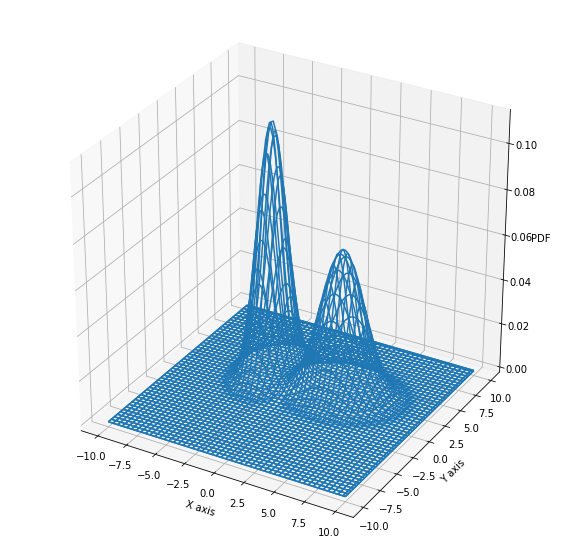

In [31]:
plt.rcParams['figure.figsize'] = [10, 10]
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
ax1.plot_wireframe(X, Y, rv0.pdf(pos), rstride=2, cstride=2)
ax1.plot_wireframe(X, Y, rv1.pdf(pos), rstride=2, cstride=2)
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('PDF')
plt.show()

In [32]:
print([p.data[0] for p in layer.parameters()])

[tensor([ 1.5247, -0.0121]), tensor(0.5760)]


In [33]:
torch.log(torch.sigmoid(torch.tensor(-100.)))

tensor(-inf)

In [34]:
F.logsigmoid(torch.tensor(-100.))

tensor(-100.)